In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys

# Root directory of the project
ROOT_DIR = os.path.abspath("../")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library

from utils.utils import *
from utils.analytic_utils import *
from credentials.blob_credentials import facts_sas_token, facts_container, workspace_sas_token, workspace_container
from azure.storage.blob import ContainerClient, BlobClient
from collections import Counter
import pandas as pd

Using TensorFlow backend.


# 1. Fetch metadata

In [2]:
records = fetch_train_set()

In [3]:
records.head(5)

sample_id construction_site  \
0  2020-08-06-07-00-08         Analytic2   
1  2020-08-06-07-00-56         Analytic2   
2  2020-08-06-07-01-43         Analytic2   
3  2020-08-06-07-02-30         Analytic2   
4  2020-08-06-07-03-16         Analytic2   

                                       image_blob_id           date_time  \
0  Analytics_Train_Set/Analytics_Train_Set_Img/20... 2020-08-06 07:00:08   
1  Analytics_Train_Set/Analytics_Train_Set_Img/20... 2020-08-06 07:00:56   
2  Analytics_Train_Set/Analytics_Train_Set_Img/20... 2020-08-06 07:01:43   
3  Analytics_Train_Set/Analytics_Train_Set_Img/20... 2020-08-06 07:02:30   
4  Analytics_Train_Set/Analytics_Train_Set_Img/20... 2020-08-06 07:03:16   

                           annotation_people_blob_id  \
0  Analytics_Train_Set/Analytics_Train_Set_Json/p...   
1  Analytics_Train_Set/Analytics_Train_Set_Json/p...   
2  Analytics_Train_Set/Analytics_Train_Set_Json/p...   
3  Analytics_Train_Set/Analytics_Train_Set_Json/p...   
4  Analytics_Train_Set/Analytics_Train_Set_Json/p...   

                             annotation_poly_blob_id annotation_blob_id  
0  Analytics_Train_Set/Analytics_Train_Set_Json/p...                NaN  
1  Analytics_Train_Set/Analytics_Train_Set_Json/p...                NaN  
2  Analytics_Train_Set/Analytics_Train_Set_Json/p...                NaN  
3  Analytics_Train_Set/Analytics_Train_Set_Json/p...                NaN  
4  Analytics_Train_Set/Analytics_Train_Set_Json/p...                NaN

In [4]:
# Distribution by type and construction site
records.construction_site.value_counts()

Analytic2                         2155
Analytic                           999
Marseille_01                       779
Devisubox2_06                      294
Nouveau_campus_03                  260
Roissy_02                          152
BioSAV_BIofiltration_18mois_05      97
Name: construction_site, dtype: int64

In [5]:
# Pack records for analysis model seperately
records_analytic = records[records.construction_site == "Analytic2"]

In [6]:
records_analytic.head()

sample_id construction_site  \
0  2020-08-06-07-00-08         Analytic2   
1  2020-08-06-07-00-56         Analytic2   
2  2020-08-06-07-01-43         Analytic2   
3  2020-08-06-07-02-30         Analytic2   
4  2020-08-06-07-03-16         Analytic2   

                                       image_blob_id           date_time  \
0  Analytics_Train_Set/Analytics_Train_Set_Img/20... 2020-08-06 07:00:08   
1  Analytics_Train_Set/Analytics_Train_Set_Img/20... 2020-08-06 07:00:56   
2  Analytics_Train_Set/Analytics_Train_Set_Img/20... 2020-08-06 07:01:43   
3  Analytics_Train_Set/Analytics_Train_Set_Img/20... 2020-08-06 07:02:30   
4  Analytics_Train_Set/Analytics_Train_Set_Img/20... 2020-08-06 07:03:16   

                           annotation_people_blob_id  \
0  Analytics_Train_Set/Analytics_Train_Set_Json/p...   
1  Analytics_Train_Set/Analytics_Train_Set_Json/p...   
2  Analytics_Train_Set/Analytics_Train_Set_Json/p...   
3  Analytics_Train_Set/Analytics_Train_Set_Json/p...   
4  Analytics_Train_Set/Analytics_Train_Set_Json/p...   

                             annotation_poly_blob_id annotation_blob_id  
0  Analytics_Train_Set/Analytics_Train_Set_Json/p...                NaN  
1  Analytics_Train_Set/Analytics_Train_Set_Json/p...                NaN  
2  Analytics_Train_Set/Analytics_Train_Set_Json/p...                NaN  
3  Analytics_Train_Set/Analytics_Train_Set_Json/p...                NaN  
4  Analytics_Train_Set/Analytics_Train_Set_Json/p...                NaN

# 2. Download dataset (takes a few minutes)

In [8]:
IMAGE_DIR  = os.path.join(ROOT_DIR, "eleven_images")

In [9]:
if True:
    for index, row in records_analytic.iterrows():
        tot_number = len(records)
        if index % 50 == 0:
            print(f"{index} / {tot_number}")
        download_sample_analytics(row["image_blob_id"], row["annotation_people_blob_id"],
                                  row["annotation_poly_blob_id"], row["sample_id"],
                                  IMAGE_DIR)

0 / 4736
50 / 4736
100 / 4736
150 / 4736
200 / 4736
250 / 4736
300 / 4736
350 / 4736
400 / 4736
450 / 4736
500 / 4736
550 / 4736
600 / 4736
650 / 4736
700 / 4736
750 / 4736
800 / 4736
850 / 4736
900 / 4736
950 / 4736
1000 / 4736
1050 / 4736
1100 / 4736
1150 / 4736
1200 / 4736
1250 / 4736
1300 / 4736
1350 / 4736
1400 / 4736
1450 / 4736
1500 / 4736
1550 / 4736
1600 / 4736
1650 / 4736
1700 / 4736
1750 / 4736
1800 / 4736
1850 / 4736
1900 / 4736
1950 / 4736
2000 / 4736
2050 / 4736
2100 / 4736
2150 / 4736


In [10]:
if True:
    for index, row in records[records.construction_site != "Analytic2"].iterrows():
        tot_number = len(records)
        if index % 50 == 0:
            print(f"{index} / {tot_number}")
        download_sample(row["image_blob_id"], row["annotation_blob_id"],
                        row["sample_id"], IMAGE_DIR)

2200 / 4736
2250 / 4736
2300 / 4736
2350 / 4736
2400 / 4736
2450 / 4736
2500 / 4736
2550 / 4736
2600 / 4736
2650 / 4736
2700 / 4736
2750 / 4736
2800 / 4736
2850 / 4736
2900 / 4736
2950 / 4736
3000 / 4736
3050 / 4736
3100 / 4736
3150 / 4736
3200 / 4736
3250 / 4736
3300 / 4736
3350 / 4736
3400 / 4736
3450 / 4736
3500 / 4736
3550 / 4736
3600 / 4736
3650 / 4736
3700 / 4736
3750 / 4736
3800 / 4736
3850 / 4736
3900 / 4736
3950 / 4736
4000 / 4736
4050 / 4736
4100 / 4736
4150 / 4736
4200 / 4736
4250 / 4736
4300 / 4736
4350 / 4736
4400 / 4736
4450 / 4736
4500 / 4736
4550 / 4736
4600 / 4736
4650 / 4736
4700 / 4736


# 3.A. Choose one sample to visualize (Detect_Train_Set + Bis)

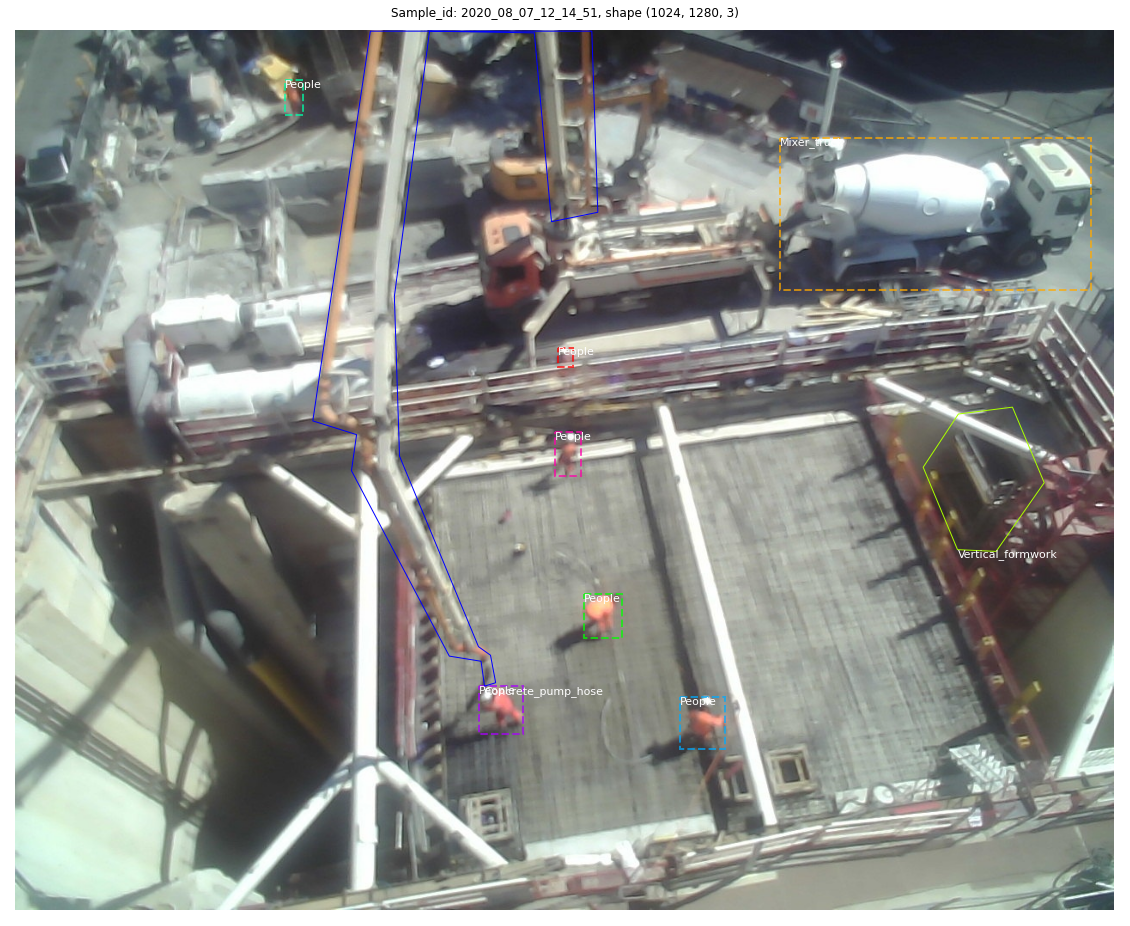

In [11]:
# Random draw a sample to visualize
row = records[records.construction_site == "Analytic"].sample(1).iloc[0]
visualize_sample(row["sample_id"], IMAGE_DIR)

# 3.B. Choose one sample to visualize (Analytics)

3 peoples + 10 polygons


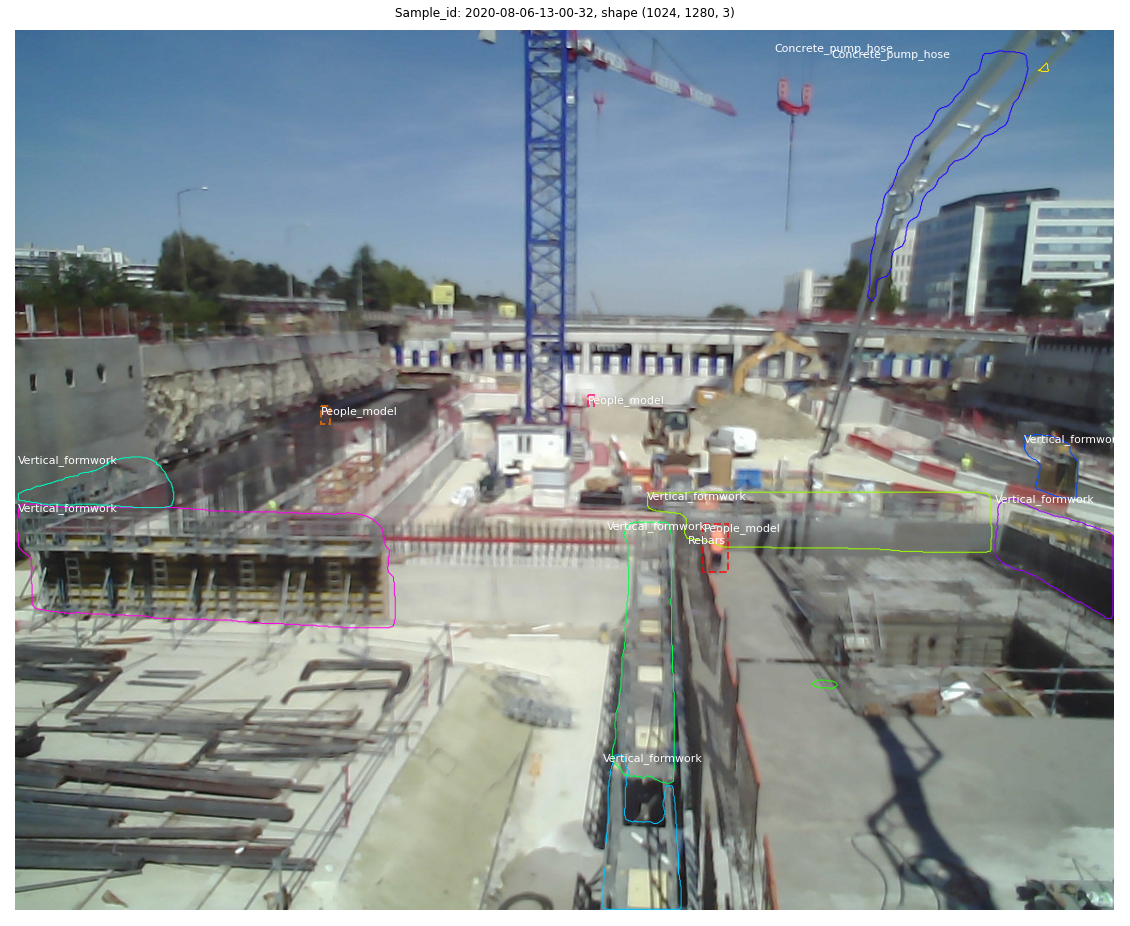

In [12]:
# Draw a sample to visualize from analytics data
visualize_sample_analytic_2('2020-08-06-13-00-32', IMAGE_DIR)

2 peoples + 8 polygons


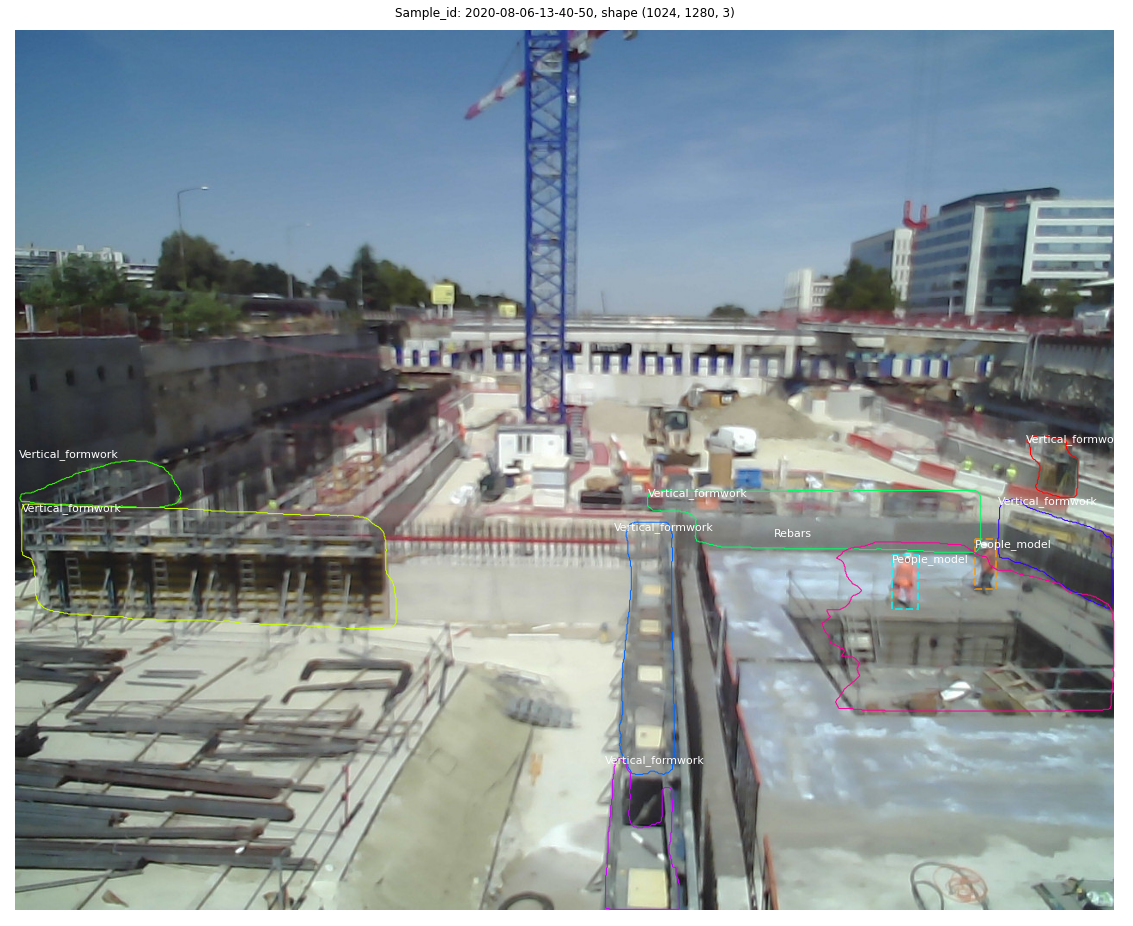

In [13]:
visualize_sample_analytic_2('2020-08-06-13-40-50', IMAGE_DIR)

# 4. Analysis model

In [15]:
pd.options.mode.chained_assignment = None

In [16]:
records_analytic['poly_objects'] = records_analytic['sample_id'].apply(lambda x: compute_objects(x, IMAGE_DIR))

In [17]:
# Counts of polygons for all classes in the dataset
objects = records_analytic['poly_objects'].tolist()
total = [item for olist in objects for item in olist]
Counter(total)

Counter({'Rebars': 1047,
         'Vertical_formwork': 14212,
         'Concrete_pump_hose': 1291,
         'Horizontal_formwork': 6})

In [18]:
# Set a boundary for each of our defined areas
area1 = np.array([(0, 560), (465, 560), (560, 415), (428, 390)])
area2 = np.array([(0, 550), (770, 555), (768, 708), (0, 688)])
area3 = np.array([(672, 1023), (705, 536), (1124, 536),
                  (1279, 585), (1279, 1023)])
image1 = cv2.drawContours(np.zeros((1024, 1280)), [area1], -1, 1, cv2.FILLED)
image2 = cv2.drawContours(np.zeros((1024, 1280)), [area2], -1, 1, cv2.FILLED)
image3 = cv2.drawContours(np.zeros((1024, 1280)), [area3], -1, 1, cv2.FILLED)

In [19]:
# Calculate areas of three sites
print(np.sum(image1))
print(np.sum(image2))
print(np.sum(image3))

50868.0
112818.0
284830.0


In [22]:
# Calculate overlapped areas if polygons and each 3 zone
records_analytic['threesites'] = records_analytic['sample_id'].apply(lambda x: overlap(x, IMAGE_DIR, image1, image2, image3))

In [23]:
# Seperate rersults for rebars and formworks
records_analytic['dis_rebar'] = records_analytic['threesites'].apply(lambda x: x[1])
records_analytic['dis_formwork'] = records_analytic['threesites'].apply(lambda x: x[0])

In [24]:
# Detect the appearance of pumps
records_analytic['dis_pump'] = records_analytic['sample_id'].apply(lambda x: detect_pump(x, IMAGE_DIR))

In [25]:
# Detect the appearance of people
records_analytic['dis_people'] = records_analytic['sample_id'].apply(lambda x: detect_people(x, IMAGE_DIR, area1, area2, area3))

In [26]:
records_analytic.drop(columns=['threesites'], inplace=True)

In [27]:
# Convert timestamps
records_analytic['timestep'] = records_analytic['sample_id'].apply(lambda x: convert(x))

In [28]:
# Combine the distribution in area 1,2 into new site 1
records_analytic['Site1formwork'] = records_analytic['dis_formwork'].apply(lambda x: x[0] + x[1])
records_analytic['Site1rebars'] = records_analytic['dis_rebar'].apply(lambda x: x[0] + x[1])
records_analytic['Site1pump'] = records_analytic['dis_pump'].apply(lambda x: x[0])
records_analytic['Site1people'] = records_analytic['dis_people'].apply(lambda x: x[0] + x[1])
# Combine the distribution in area3 to new site 2
records_analytic['Site2formwork'] = records_analytic['dis_formwork'].apply(lambda x: x[2])
records_analytic['Site2rebars'] = records_analytic['dis_rebar'].apply(lambda x: x[2])
records_analytic['Site2pump'] = records_analytic['dis_pump'].apply(lambda x: x[2])
records_analytic['Site2people'] = records_analytic['dis_people'].apply(lambda x: x[2])

In [29]:
# Detect whether it is concreting
records_analytic['if_Site1_concret'] = records_analytic.apply(lambda row: if_concreting(row['Site1formwork'], row['Site1pump'], row['Site1people']), axis=1)
records_analytic['if_Site2_concret'] = records_analytic.apply(lambda row: if_concreting(row['Site2formwork'], row['Site2pump'], row['Site2people']), axis=1)

In [30]:
records_analytic.head(5)

sample_id construction_site  \
0  2020-08-06-07-00-08         Analytic2   
1  2020-08-06-07-00-56         Analytic2   
2  2020-08-06-07-01-43         Analytic2   
3  2020-08-06-07-02-30         Analytic2   
4  2020-08-06-07-03-16         Analytic2   

                                       image_blob_id           date_time  \
0  Analytics_Train_Set/Analytics_Train_Set_Img/20... 2020-08-06 07:00:08   
1  Analytics_Train_Set/Analytics_Train_Set_Img/20... 2020-08-06 07:00:56   
2  Analytics_Train_Set/Analytics_Train_Set_Img/20... 2020-08-06 07:01:43   
3  Analytics_Train_Set/Analytics_Train_Set_Img/20... 2020-08-06 07:02:30   
4  Analytics_Train_Set/Analytics_Train_Set_Img/20... 2020-08-06 07:03:16   

                           annotation_people_blob_id  \
0  Analytics_Train_Set/Analytics_Train_Set_Json/p...   
1  Analytics_Train_Set/Analytics_Train_Set_Json/p...   
2  Analytics_Train_Set/Analytics_Train_Set_Json/p...   
3  Analytics_Train_Set/Analytics_Train_Set_Json/p...   
4  Analytics_Train_Set/Analytics_Train_Set_Json/p...   

                             annotation_poly_blob_id annotation_blob_id  \
0  Analytics_Train_Set/Analytics_Train_Set_Json/p...                NaN   
1  Analytics_Train_Set/Analytics_Train_Set_Json/p...                NaN   
2  Analytics_Train_Set/Analytics_Train_Set_Json/p...                NaN   
3  Analytics_Train_Set/Analytics_Train_Set_Json/p...                NaN   
4  Analytics_Train_Set/Analytics_Train_Set_Json/p...                NaN   

                                        poly_objects dis_people  dis_rebar  \
0  [Rebars, Vertical_formwork, Vertical_formwork,...  [0, 0, 0]  [0, 0, 1]   
1  [Rebars, Vertical_formwork, Vertical_formwork,...  [0, 0, 0]  [0, 0, 1]   
2  [Vertical_formwork, Rebars, Vertical_formwork,...  [0, 0, 0]  [0, 0, 1]   
3  [Rebars, Vertical_formwork, Vertical_formwork,...  [0, 0, 0]  [0, 0, 1]   
4  [Rebars, Vertical_formwork, Vertical_formwork,...  [0, 0, 0]  [0, 0, 1]   

   ... Site1formwork Site1rebars Site1pump  Site1people  Site2formwork  \
0  ...             1           0         0            0              3   
1  ...             1           0         0            0              3   
2  ...             1           0         0            0              3   
3  ...             2           0         0            0              3   
4  ...             1           0         0            0              4   

   Site2rebars  Site2pump  Site2people  if_Site1_concret  if_Site2_concret  
0            1          1            0                 0                 0  
1            1          1            0                 0                 0  
2            1          1            0                 0                 0  
3            1          1            0                 0                 0  
4            1          0            0                 0                 0  

[5 rows x 23 columns]

In [31]:
records_analytic.to_csv('analytics.csv')